In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import graphviz

# Load the dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None)

column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
data.columns = column_names

# Preprocess the data
data = data.replace({'?': None}) 
data = data.dropna() 
data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0) 



In [3]:

X = data.drop('num', axis=1)
y = data['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the decision tree classifier
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

Accuracy: 80.00%


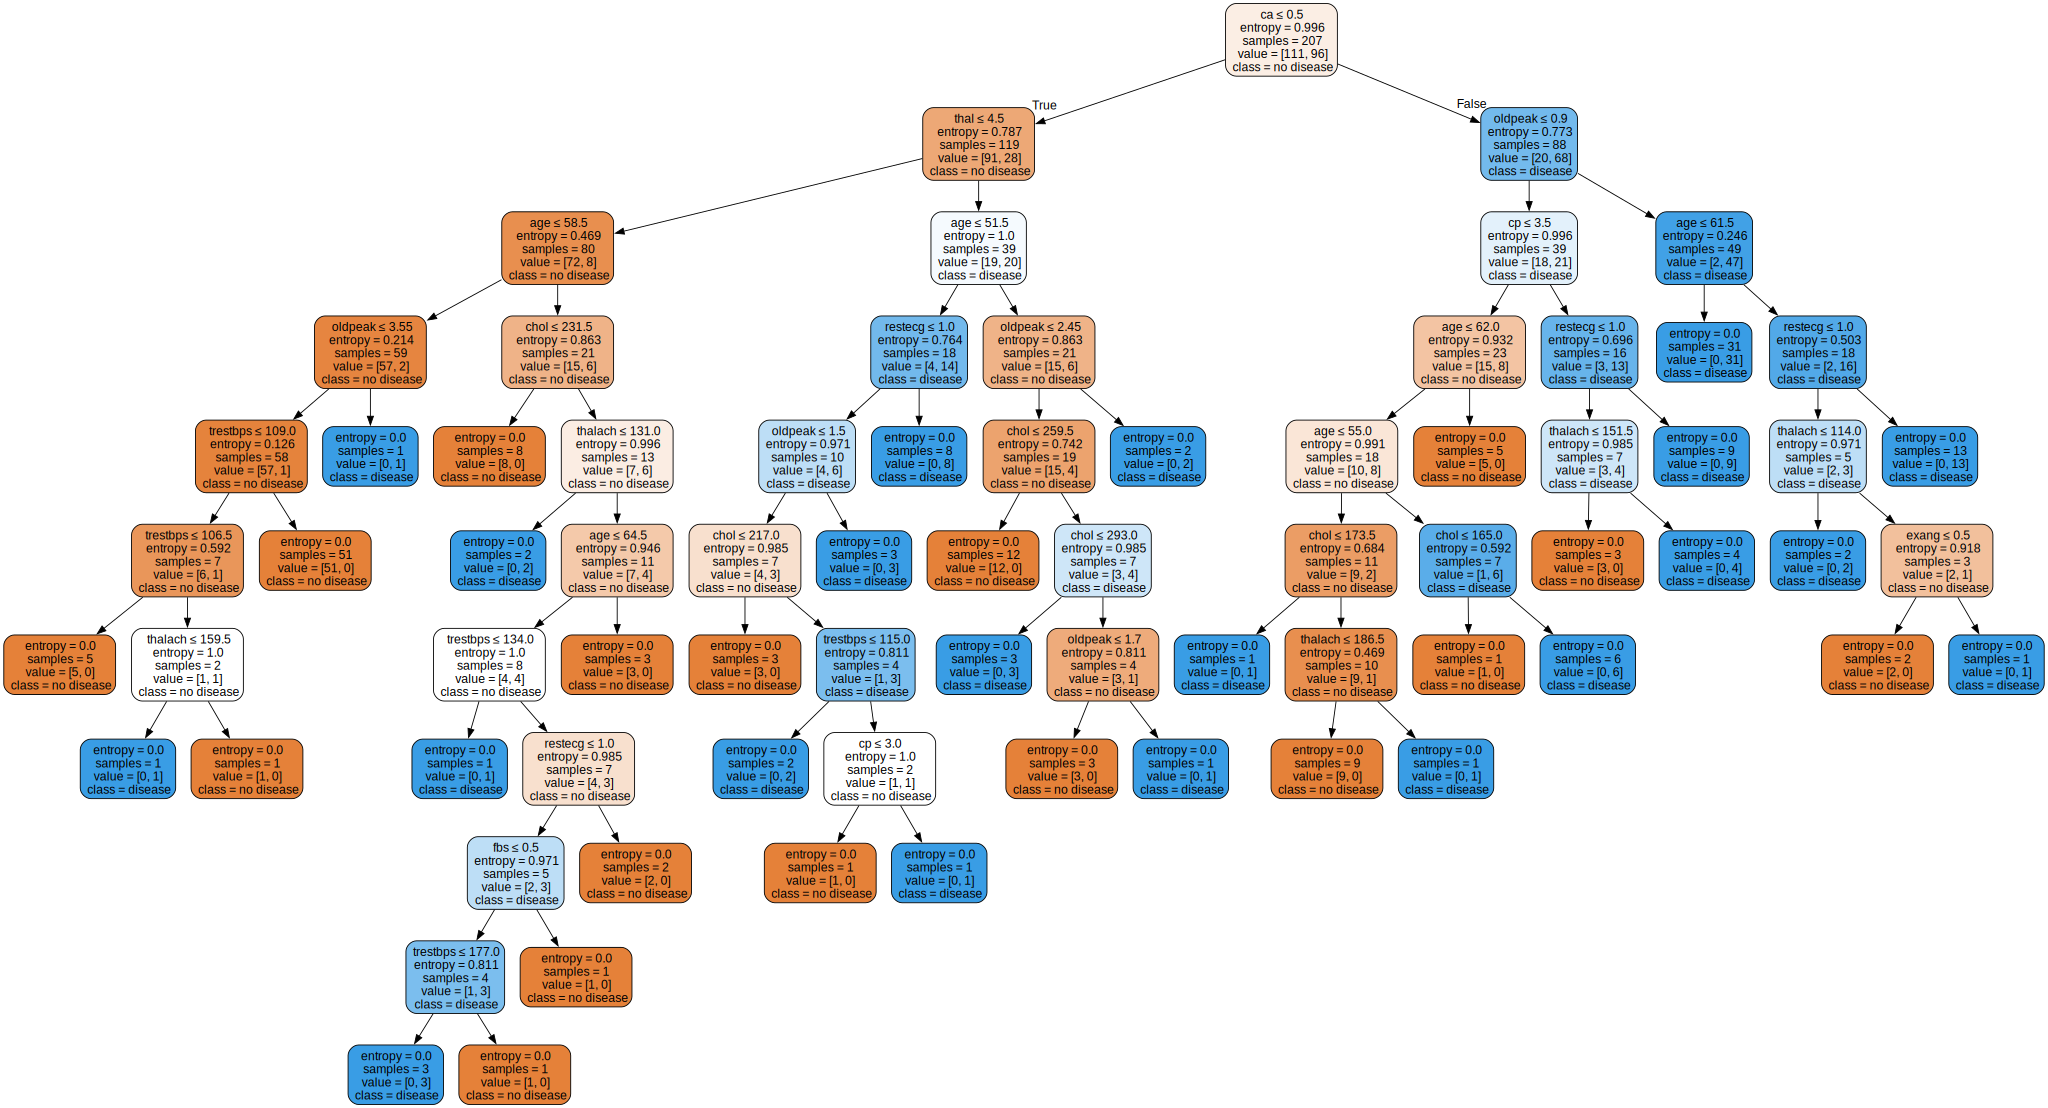

In [4]:
# Predict
y_pred = clf.predict(X_test)

# Evaluate 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Visualize
dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=['no disease', 'disease'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)

graph


In [5]:
from sklearn.metrics import confusion_matrix
import pandas as pd

cm_dt = confusion_matrix(y_test, y_pred)

confusion_labels = ['No Disease', 'Disease']
cm_labeled = pd.DataFrame(cm_dt, columns=['Predicted ' + label for label in confusion_labels], 
                          index=['Actual ' + label for label in confusion_labels])

print("Confusion Matrix:")
print(cm_labeled)


Confusion Matrix:
                   Predicted No Disease  Predicted Disease
Actual No Disease                    42                  7
Actual Disease                       11                 30


/Users/wwami/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


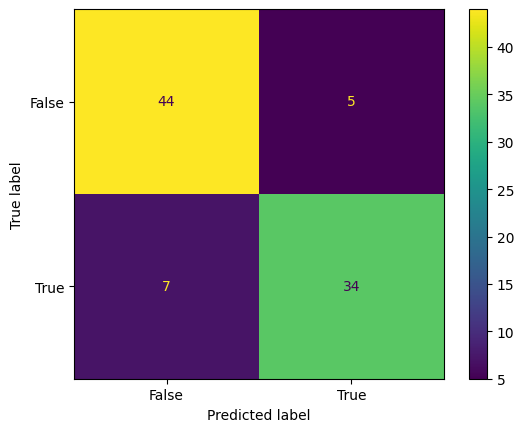

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt


classifier=LogisticRegression().fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
